In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df0 = pd.read_csv('eth_blocks.csv')
df0.head()

,timestamp,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,transaction_count,base_fee_per_gas
0,2021-08-22 00:23:34+00:00,13071857,0x1959c77933c5ea726e8150dd6c46bb4d1c3f2ab65c9b...,0x1290601507c95d583ccb9951cc36e21db7de9c974b67...,0x08c92803f8a02390,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd1b9bdb7e1be3aeb9aad9d5feb789afd7a749cf7bd9a...,0x0127e8cd9dd346f600df7a704b826478977deed11f6e...,0x71e9b09a0085832884a4e54b6e0032a3f1b0431b2855...,0xfcdda7ec006dac4b1b25791747508dba4859f98da366...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8201326215003715,29322554754966640405066,121085,0x20,29941410,29932189,269,2.290552e+10
1,2021-08-22 14:02:54+00:00,13075555,0x8c0ad10013bdc8475d98a2652dffe5dd2166d73d4c96...,0x22fbc497187c2bc71892819daf6e6c41ceab5ab62719...,0x01fb28086b26b57b,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x51a366fb7b1bbfd7dfd72ae7e1394b15361a306d7339...,0x462e39ccd595b116374ac159465886f454a9176952e8...,0x21fa0a5e7eced20042e20b37a68797fabf35d89d7ccc...,0x67cf4e696c5e682fddd2194b9983edbdf1bb7f2e2f72...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8205530929493774,29352325330915075982650,113472,0x20,30029208,22871216,307,4.365599e+10
2,2021-08-22 04:55:04+00:00,13073088,0xccae13bfbd87a706f0d70cf278e3101e0b4972d814d9...,0x4b67446b82fa436f72e000e378892cd6ef1ebf72accc...,0x05fe0802d72d3517,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x1ff7d902d12776f196efa6e1d233be853dfa50d70bf9...,0x3770698a25e5631b0112b66e7d16650e3bf215442bf5...,0x074d6f2f9b89c5df7bce9d4cc2bb7e087aa84f478b24...,0xc89c9e00c2f86bc187ca63cdfb4494562e3e78e3838e...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8125513716718054,29332554950124882998729,110035,0x20,30034152,30033910,423,1.652552e+10
3,2021-08-22 23:27:24+00:00,13078105,0xc75d4d5d8d212de3309d672d7e7386686ce174c07452...,0x8e090212824813725eaac45f6cb986cdaa1260cbe433...,0xabead9c9dff61e9c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x8530658f67a90c83d5bfa3c8cd3776699122102da311...,0xf2ba673b806cc5d862ad91ce7a90d5f4556593423231...,0xc42190156d674318aa6e930178321a3f0b7a8936b0b7...,0x5332e7f960eeb6ab69712537809d6be85bd62ec83cd0...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,8230100106433344,29373023438071345937896,120750,0x3636,30122367,18869260,251,5.588001e+10
4,2021-08-22 08:16:08+00:00,13073956,0xf2fa6d5115798ed8f45ce6961e0e238c7c4258b54aff...,0x3ffa3784b1ea52176d4b6583b5b170d152cb8088f6a3...,0xe5685f51a73d68fd,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xdc6575eee5f27bf196ceadf686aede197f12fe79e3b5...,0x4fbfe76fd438e2f86bbccabd2413e78bf29c1b331f0e...,0xc7f3f1be735f9d4ff410dc418cbc3c80b3342bca807b...,0x1d3fb778bd29a45d0bc46ae67d3252d9ed708640c300...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,7898356713780692,29339550290282855052583,135481,0x3636,30058475,30048024,443,3.319848e+10


In [24]:
df0.shape

(200087, 19)

### Our dataset has more than 200000 (2 x 10^5) samples with 19 attributes

In [25]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200087 entries, 0 to 200086
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          200087 non-null  object 
 1   number             200087 non-null  int64  
 2   hash               200087 non-null  object 
 3   parent_hash        200087 non-null  object 
 4   nonce              200087 non-null  object 
 5   sha3_uncles        200087 non-null  object 
 6   logs_bloom         200087 non-null  object 
 7   transactions_root  200087 non-null  object 
 8   state_root         200087 non-null  object 
 9   receipts_root      200087 non-null  object 
 10  miner              200087 non-null  object 
 11  difficulty         200087 non-null  int64  
 12  total_difficulty   200087 non-null  object 
 13  size               200087 non-null  int64  
 14  extra_data         200087 non-null  object 
 15  gas_limit          200087 non-null  int64  
 16  ga

### base_fee_per_gas is null for some samples, we remove these from the dataset. This leaves us with about 170000 (1.7 x 10^5) samples

In [26]:
len(df0.dropna())

171427

In [27]:
df0.describe()

,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas
count,2.000870e+05,2.000870e+05,200087.000000,2.000870e+05,2.000870e+05,200087.000000,1.714270e+05
mean,1.303638e+07,7.868515e+15,75530.871931,2.784577e+07,1.535856e+07,186.171265,5.961354e+10
std,5.776029e+04,3.238408e+14,53507.144403,5.261158e+06,9.744421e+06,132.218185,7.748271e+10
min,1.293634e+07,7.116728e+15,520.000000,1.481054e+07,0.000000e+00,0.000000,1.000000e+09
25%,1.298636e+07,7.619358e+15,32379.000000,2.997070e+07,6.934991e+06,83.000000,3.407347e+10
50%,1.303638e+07,7.822122e+15,66326.000000,3.000000e+07,1.496918e+07,167.000000,4.624005e+10
75%,1.308640e+07,8.131713e+15,112077.000000,3.002927e+07,2.423700e+07,269.000000,6.717335e+10
max,1.313643e+07,8.713208e+15,512446.000000,3.038299e+07,3.029293e+07,1431.000000,2.889181e+12


### The string attributes are not useful for this particular problem as they don't directly affect the gas price, these attributes can be removed. We keep timestamps for future usage.

In [28]:
cols = list(df0.describe().columns) + ['timestamp']
df = df0[df0.columns[df0.columns.isin(cols)]]
df.head()

,timestamp,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas
0,2021-08-22 00:23:34+00:00,13071857,8201326215003715,121085,29941410,29932189,269,2.290552e+10
1,2021-08-22 14:02:54+00:00,13075555,8205530929493774,113472,30029208,22871216,307,4.365599e+10
2,2021-08-22 04:55:04+00:00,13073088,8125513716718054,110035,30034152,30033910,423,1.652552e+10
3,2021-08-22 23:27:24+00:00,13078105,8230100106433344,120750,30122367,18869260,251,5.588001e+10
4,2021-08-22 08:16:08+00:00,13073956,7898356713780692,135481,30058475,30048024,443,3.319848e+10


<AxesSubplot:>

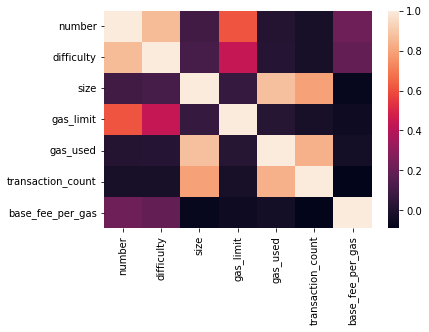

In [29]:
corr = df0.corr()
sns.heatmap(corr)

In [30]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

['difficulty', 'gas_used', 'transaction_count']

### We see that there are a few attributes that have moderately high correlation, but it is not extremely high, so we keep them in our dataset for now

### Standardising the input data using StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns[2:-1]] = scaler.fit_transform(df[df.columns[2:-1]])
df.head()

c:\users\aryan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,timestamp,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas
0,2021-08-22 00:23:34+00:00,13071857,1.027702,0.851367,0.398324,1.495590,0.626457,2.290552e+10
1,2021-08-22 14:02:54+00:00,13075555,1.040686,0.709087,0.415012,0.770971,0.913861,4.365599e+10
2,2021-08-22 04:55:04+00:00,13073088,0.793597,0.644852,0.415952,1.506029,1.791201,1.652552e+10
3,2021-08-22 23:27:24+00:00,13078105,1.116554,0.845107,0.432719,0.360278,0.490318,5.588001e+10
4,2021-08-22 08:16:08+00:00,13073956,0.092149,1.120416,0.420575,1.507478,1.942466,3.319848e+10


In [32]:
df.head()

,timestamp,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas
0,2021-08-22 00:23:34+00:00,13071857,1.027702,0.851367,0.398324,1.495590,0.626457,2.290552e+10
1,2021-08-22 14:02:54+00:00,13075555,1.040686,0.709087,0.415012,0.770971,0.913861,4.365599e+10
2,2021-08-22 04:55:04+00:00,13073088,0.793597,0.644852,0.415952,1.506029,1.791201,1.652552e+10
3,2021-08-22 23:27:24+00:00,13078105,1.116554,0.845107,0.432719,0.360278,0.490318,5.588001e+10
4,2021-08-22 08:16:08+00:00,13073956,0.092149,1.120416,0.420575,1.507478,1.942466,3.319848e+10


In [33]:
dfc = df.copy()
dfc['date'] = pd.to_datetime(df['timestamp']).dt.day
dfc.head()

,timestamp,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas,date
0,2021-08-22 00:23:34+00:00,13071857,1.027702,0.851367,0.398324,1.495590,0.626457,2.290552e+10,22
1,2021-08-22 14:02:54+00:00,13075555,1.040686,0.709087,0.415012,0.770971,0.913861,4.365599e+10,22
2,2021-08-22 04:55:04+00:00,13073088,0.793597,0.644852,0.415952,1.506029,1.791201,1.652552e+10,22
3,2021-08-22 23:27:24+00:00,13078105,1.116554,0.845107,0.432719,0.360278,0.490318,5.588001e+10,22
4,2021-08-22 08:16:08+00:00,13073956,0.092149,1.120416,0.420575,1.507478,1.942466,3.319848e+10,22


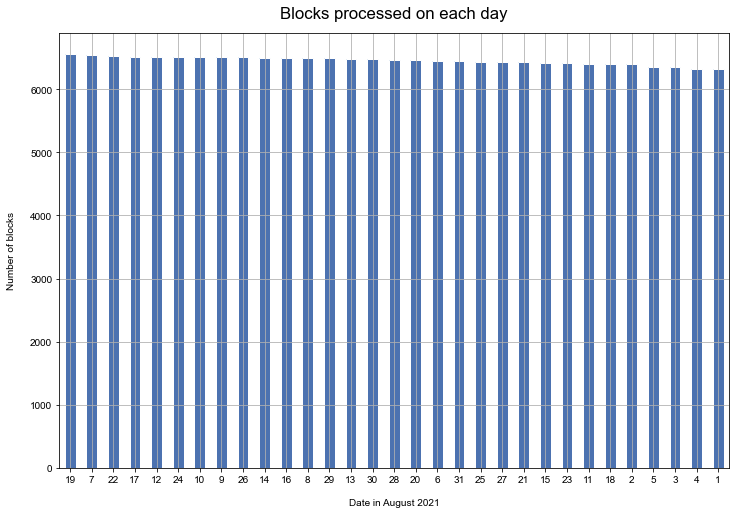

In [34]:
dfc['date'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
dfc['date'].value_counts().plot(kind='bar', figsize=(12, 8), rot=0)
plt.xlabel("Date in August 2021", labelpad=14)
plt.ylabel("Number of blocks", labelpad=14)
plt.title("Blocks processed on each day", y=1.02)
plt.show()

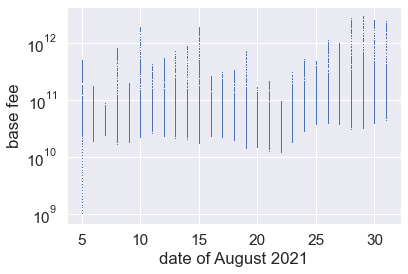

In [35]:
plt.subplot(1, 1, 1)
plt.plot(dfc['date'], df['base_fee_per_gas'], ',')
plt.yscale('log')
plt.xlabel('date of August 2021')
plt.ylabel('base fee')
plt.show()

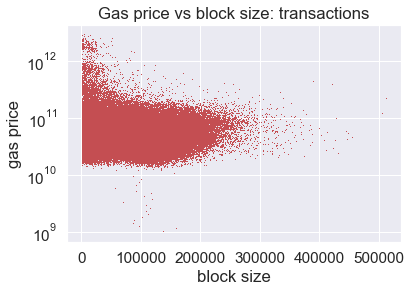

In [37]:
plt.subplot(1, 1, 1)
plt.plot(df0['size'], df0['base_fee_per_gas'], ',r')
plt.yscale('log')
plt.xlabel('block size')
plt.ylabel('gas price')
plt.title('Gas price vs block size: transactions')
plt.show()

### We can see that throughout the month, the base fee remains relatively stable for the blocks, and the size of block also does not noticably affect the base fee

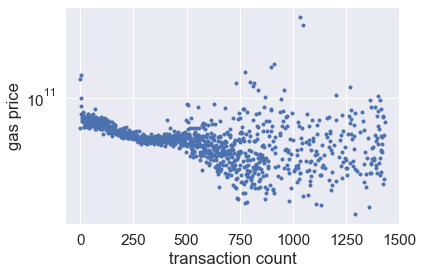

In [40]:
tcountfee = df0.groupby('transaction_count').mean().iloc[:, -1]
plt.plot(tcountfee, '.')
plt.yscale('log')
plt.xlabel('transaction count')
plt.ylabel('gas price')
plt.show()